In [1]:
from IPython.display import display
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.options.display.expand_frame_repr = False

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import boxcox
from scipy.stats import zscore

In [3]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot

In [4]:
def norm_data(df):
    """ Нормализуем данные """
    for col in df.columns:
        label_encoder = LabelEncoder()
        scaler = MinMaxScaler()
        if df[col].dtype.kind in 'O':
            df[col] = label_encoder.fit_transform(df[col])
        elif df[col].dtype.kind in 'iufc':
            if df[col].min() != 0 and df[col].min() != 1:
                df[col] = scaler.fit_transform(df[[col]])
            else:
                pass
    return df

,carbon_monoxide,tar,nicotine,weight
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


,carbon_monoxide,tar,nicotine,weight
0,14.1,0.384211,0.526981,0.550000
1,16.0,0.489474,0.812582,0.686364
2,29.8,1.000000,1.000000,1.000000
3,8.0,0.284211,0.376152,0.395455
4,4.1,0.142105,0.424059,0.177273
5,15.0,0.478947,0.272177,0.613636
6,8.8,0.331579,0.635957,0.340909
7,12.4,0.431579,0.361674,0.490909
8,16.6,0.521053,0.400369,0.672727
9,14.9,0.468421,0.265070,0.631818


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_monoxide  25 non-null     float64
 1   tar              25 non-null     float64
 2   nicotine         25 non-null     float64
 3   weight           25 non-null     float64
dtypes: float64(4)
memory usage: 928.0 bytes


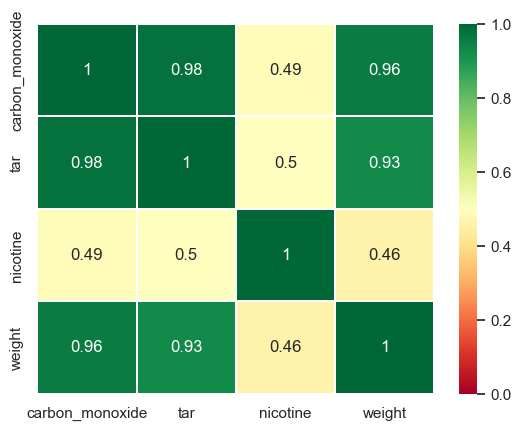

In [5]:
# Read dataframe
data = pd.read_csv('cigarettes.txt', names=['Brand', 'carbon_monoxide', 'tar', 'nicotine', 'weight'])
data = data.drop('Brand', axis=1)
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'carbon_monoxide' 
data.info()

### Линейная регрессия

In [6]:
class LinearRegressionResearch:
    def __init__(self, df, column, influence_measures_filename=None):
        self.filename = influence_measures_filename
        
        self.df = df
        self.column = column
        self.x = df.drop(columns=column)
        self.y = df[column]
        
        x_columns = "+".join(self.x.columns)
        model_formula = f'{self.column} ~ {x_columns}'
        self.model = ols(model_formula, data=self.df)
        self.results = self.model.fit()
        self.residuals = self.results.resid
        
    def info(self):
        # Использование библиотеки statsmodels для получения summary
        print(self.results.summary(title=self.column))
        
        # Вывод уравнения(закона) регрессии
        intercept = self.results.params[0]
        coefficients = self.results.params[1:]
        output_str = f'Law:\n{self.column} = '
        for i, c in enumerate(self.results.params.index[1:]):
            output_str += f'({coefficients[i]}) * {c} + '
            if i % 2 != 0:
                output_str += '\n'
        output_str += f'({intercept})'
        print(output_str)
        
        # Проведём анализ дисперсии модели
        print('==============================================================================')
        anova_result = anova_lm(self.results)
        print(anova_result)
        
        # Получение мер влиятельности для каждого наблюдения
        print('==============================================================================')
        influence = self.results.get_influence()
        influence_measures = influence.summary_frame()
        if self.filename is not None:
            influence_measures.to_csv(f'{self.filename}.csv', index=False)
        display(influence_measures)
    
    def draw_plots(self):
        # Scatter plots
        scatter_plots  = sns.pairplot(data, x_vars=self.df.columns, y_vars=self.df.columns, kind='reg')
        scatter_plots.fig.suptitle("Pair-plot with Regression Lines", y=1, fontsize=20)
        plt.show()

        # Residuals vs Fitted
        plt.scatter(self.results.predict(self.x), self.residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Residuals vs Fitted')
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.show()

        # Residuals vs Fitted
        plt.scatter(self.results.predict(self.x), np.sqrt(zscore(self.residuals)))
        plt.title('Scale-Location')
        plt.xlabel('Fitted values')
        plt.ylabel('\u221AStandardized residuals')
        plt.show()

        # Normal Q-Q plot
        QQ = ProbPlot(zscore(self.residuals))
        QQ.qqplot(line='45', alpha=0.5, lw=1)
        plt.title('Normal Q-Q')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Standardized residuals')
        plt.show()
        
        # График Residuals vs Leverage
        fig, ax = plt.subplots(figsize=(12, 8))
        sm.graphics.influence_plot(self.results, criterion="cooks", size=25, plot_alpha=0.5, ax=ax)
        plt.title('Residuals vs Leverage', fontsize=20)
        plt.show()
    
    def run_tests(self):
        print('==============================================================================')
        # Теста Бройша-Пагана (Breusch-Pagan test) на гетероскедастичность.
        het_test = sms.het_breuschpagan(self.residuals, self.model.exog)
        print(f'Breusch-Pagan test: \n'
              f'LM statistic: {het_test[0]}      LM-Test p-value: {het_test[1]:} \n'
              f'F-statistic: {het_test[2]}       F-Test p-value: {het_test[3]:} \n')
        
        # Проводим тест Дарбина-Уотсона (Durbin-Watson test) на автокорреляцию остатков.
        durbin_watson_statistic = sms.durbin_watson(self.residuals)
        print(f'Durbin-Watson test:\n'
              f'statistic: {durbin_watson_statistic} \n')
        
        # Проводим тесты на нормальность распределения остатков. 
        jarque_bera_test = sms.jarque_bera(self.residuals)
        print(f'Jarque-Bera test:\n'
              f'statistic: {jarque_bera_test[0]}      p-value: {jarque_bera_test[1]}')
        omni_normtest_statistic, omni_normtest_p_value = sms.omni_normtest(self.residuals)
        print(f'Omni-normtest test:\n'
              f'statistic: {omni_normtest_statistic}      p-value: {omni_normtest_statistic}')
        
        # Проверяем модель на мультиколлинеарность данных.
        print('==============================================================================')
        vif_tol_data = pd.DataFrame()
        vif_tol_data["Variable"] = self.x.columns
        vif_tol_data["VIF"] = [variance_inflation_factor(self.x.values, i) for i in range(self.x.shape[1])]
        vif_tol_data["Tolerance"] = 1 / vif_tol_data["VIF"]
        display(vif_tol_data)

### Строим базовую модель

In [7]:
base_research = LinearRegressionResearch(data, column=explore_column)
base_research.info()

                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           9.95e-17
Time:                        16:56:34   Log-Likelihood:                -32.889
No. Observations:                  25   AIC:                             73.78
Df Residuals:                      21   BIC:                             78.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2565      0.564     -0.455      0.6

,dfb_Intercept,dfb_tar,dfb_nicotine,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.010305,-0.257601,0.080907,0.258683,0.045853,1.647378,0.063306,0.428268,1.722848,0.447888
1,-0.022931,-0.023380,0.031074,0.023474,0.000576,0.107551,0.166207,0.048019,0.104988,0.046874
2,-1.113964,1.748143,0.437587,-1.186843,1.411701,1.759391,0.645920,2.376301,1.859498,2.511509
3,-0.200628,0.068926,0.053222,-0.031238,0.019624,-1.140943,0.056872,-0.280173,-1.149649,-0.282311
4,-0.043373,-0.000752,-0.014367,0.021287,0.000876,-0.144423,0.143771,-0.059180,-0.141012,-0.057783
5,0.005303,0.002482,-0.014528,0.002718,0.000093,0.050699,0.126748,0.019315,0.049480,0.018851
6,-0.096164,-0.118868,-0.151164,0.188609,0.022024,-0.743327,0.137515,-0.296810,-0.735148,-0.293544
7,-0.073103,-0.080587,0.074278,0.063113,0.005045,-0.475323,0.081996,-0.142057,-0.466383,-0.139385
8,0.002180,0.002799,-0.047204,0.023911,0.001932,0.269659,0.096071,0.087911,0.263617,0.085941
9,-0.002834,0.000823,0.009393,-0.004274,0.000042,-0.032474,0.138078,-0.012997,-0.031692,-0.012685


### Попытаемся улучшить базовую модель при помощи (AIC/BIC) 

In [8]:
def stepwise_selection(df, column, criteria: str = 'AIC'):
    """ 
        Улучшаем модель при помощи:
            ::AIC (Akaike Information Criterion) 
                            или
            ::BIC (Bayesian Information Criterion) 
    """
    
    # Проверка, что criteria является строкой и принимает только 'AIC' или 'BIC'
    if not isinstance(criteria, str) or criteria not in ['AIC', 'BIC']:
        raise ValueError("Параметр 'criteria' должен быть строкой ('AIC' или 'BIC').")
    else:
        criteria = criteria.upper()
    
    
    drop_index = None
    output = ('                                    STEPS                                     \n'
              '==============================================================================\n')
    
    x = df.drop(columns=column)
    y = df[column]
    remaining_features = list(x.columns)
    best_model = sm.OLS(y, sm.add_constant(x[remaining_features])).fit()
    best_criterion = best_model.aic if criteria == 'AIC' else best_model.bic
    
    k = True
    while k:
        k = False
        output += (f'Selected Features: {remaining_features} \n'
                   f'{criteria}: {best_criterion} \n')
        
        for index in range(len(remaining_features)):
            features = remaining_features[:index] + remaining_features[(index+1):]
            model = sm.OLS(y, sm.add_constant(x[features])).fit()
            criterion = model.aic if criteria == 'AIC' else model.bic
    
            if criterion < best_criterion:
                k = True
                best_criterion = criterion
                best_model = model
                drop_index = index

        if k:
            remaining_features.pop(drop_index)
    
    print(output)
    return best_model, remaining_features

In [9]:
# Пошаговый отбор признаков с использованием AIC
new_model, selected_features = stepwise_selection(data, column=explore_column, criteria='AIC')

                                    STEPS                                     
Selected Features: ['tar', 'nicotine', 'weight'] 
AIC: 73.77895776832695 
Selected Features: ['tar', 'weight'] 
AIC: 71.7839037247646 


### Проведём исследование улучшенной модели

                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     405.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           4.33e-18
Time:                        16:56:34   Log-Likelihood:                -32.892
No. Observations:                  25   AIC:                             71.78
Df Residuals:                      22   BIC:                             75.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2408      0.496     -0.485      0.6

,dfb_Intercept,dfb_tar,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.051643,-0.252054,0.265180,0.061901,1.687217,0.061240,0.430934,1.766683,0.451230
1,-0.011627,-0.019092,0.026125,0.000529,0.124268,0.093162,0.039830,0.121453,0.038928
2,-1.001219,1.837932,-1.157471,1.746029,1.767850,0.626312,2.288687,1.864726,2.414104
3,-0.202017,0.084065,-0.031889,0.026457,-1.169479,0.054850,-0.281729,-1.179853,-0.284228
4,-0.053299,-0.003746,0.020569,0.001024,-0.140358,0.134883,-0.055422,-0.137193,-0.054172
5,-0.000658,-0.000353,0.001585,0.000018,0.031199,0.051461,0.007267,0.030483,0.007100
6,-0.173200,-0.148761,0.181555,0.020069,-0.731867,0.101048,-0.245373,-0.723907,-0.242705
7,-0.046309,-0.067801,0.064623,0.005008,-0.490781,0.058711,-0.122570,-0.482144,-0.120413
8,-0.019308,-0.006960,0.022606,0.001621,0.260029,0.067088,0.069730,0.254442,0.068232
9,0.002064,0.004292,-0.006360,0.000057,-0.050611,0.062362,-0.013052,-0.049450,-0.012753


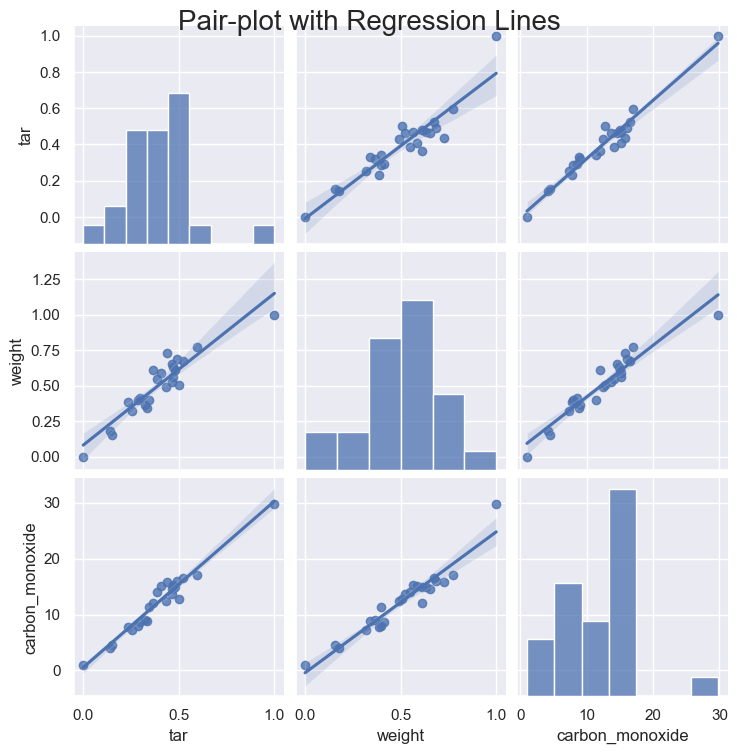

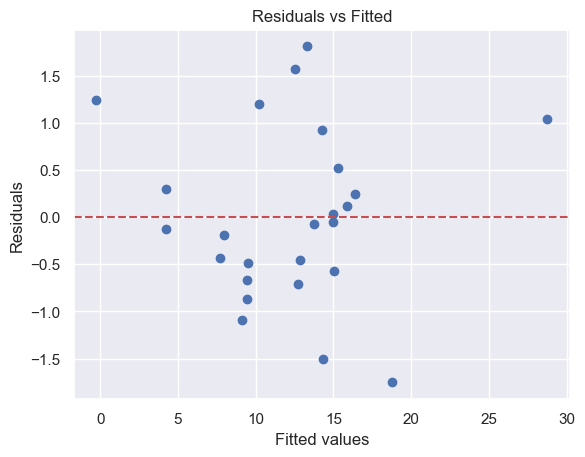

D:\PythonEnv\Matt\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


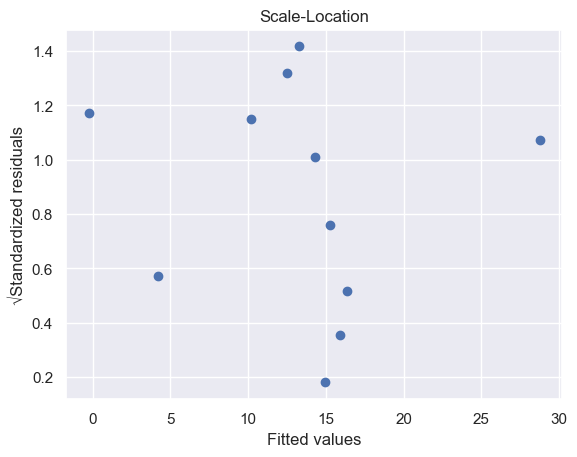

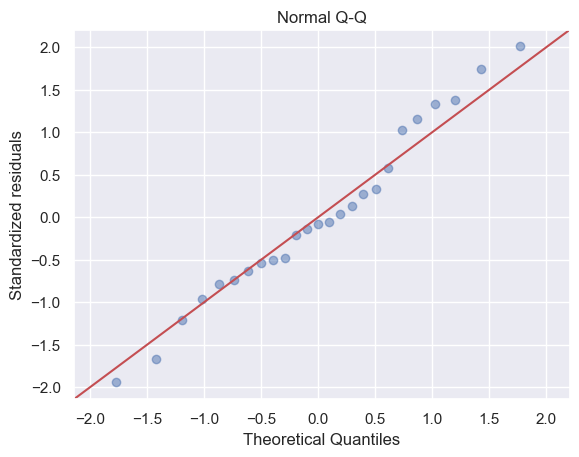

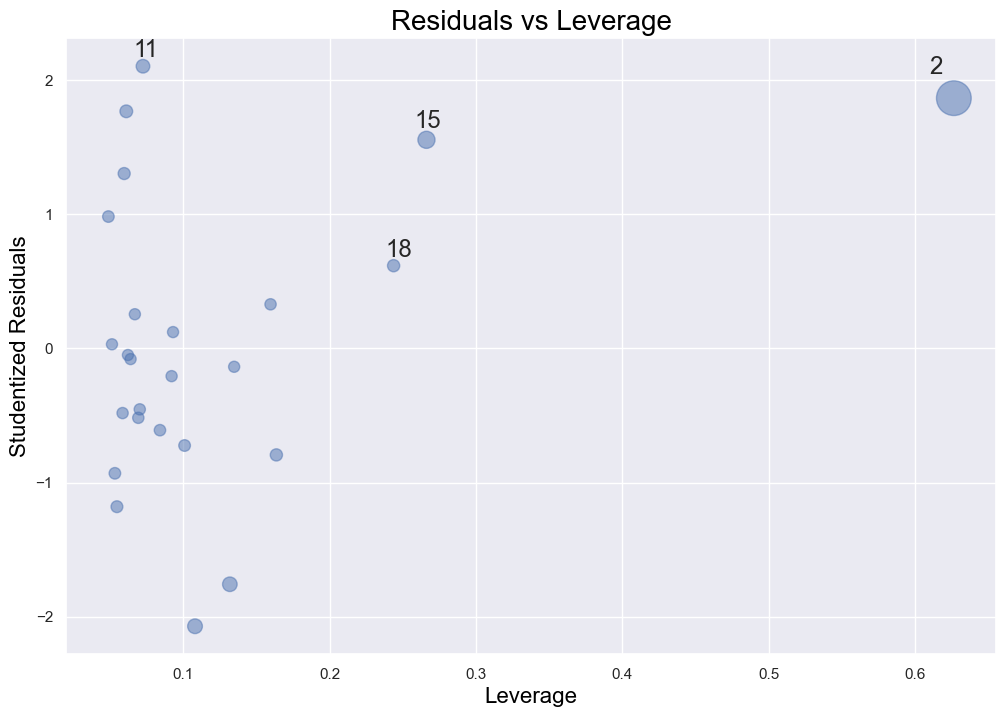

Breusch-Pagan test: 
LM statistic: 0.5408042285094339      LM-Test p-value: 0.7630725902698072 
F-statistic: 0.24321513140418477       F-Test p-value: 0.786183290812382 

Durbin-Watson test:
statistic: 2.210122476634224 

Jarque-Bera test:
statistic: 0.47823252925785503      p-value: 0.7873233391952967
Omni-normtest test:
statistic: 0.3218190272794479      p-value: 0.3218190272794479


,Variable,VIF,Tolerance
0,tar,39.377802,0.025395
1,weight,39.377802,0.025395


In [10]:
enhanced_research = LinearRegressionResearch(data[selected_features + [explore_column]], column=explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

                              carbon_monoxide_t                               
Dep. Variable:      carbon_monoxide_t   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     460.2
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.12e-18
Time:                        16:56:38   Log-Likelihood:                -13.210
No. Observations:                  25   AIC:                             32.42
Df Residuals:                      22   BIC:                             36.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1428      0.226      5.062      0.0

,dfb_Intercept,dfb_tar,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.058593,-0.285973,0.300866,7.682704e-02,1.879655,0.061240,0.480084,2.004429,0.511953
1,0.000061,0.000101,-0.000138,1.473292e-08,-0.000656,0.093162,-0.000210,-0.000641,-0.000205
2,0.314031,-0.576465,0.363039,1.969990e-01,-0.593816,0.626312,-0.768763,-0.584869,-0.757181
3,-0.190261,0.079173,-0.030033,2.363343e-02,-1.105312,0.054850,-0.266271,-1.111194,-0.267688
4,-0.237312,-0.016680,0.091583,1.996095e-02,-0.619741,0.134883,-0.244710,-0.610848,-0.241198
5,-0.005168,-0.002772,0.012452,1.083322e-03,0.244752,0.051461,0.057008,0.239451,0.055774
6,-0.019318,-0.016593,0.020250,2.558327e-04,-0.082631,0.101048,-0.027704,-0.080744,-0.027071
7,0.010245,0.014999,-0.014296,2.476544e-04,0.109141,0.058711,0.027257,0.106660,0.026638
8,-0.022118,-0.007973,0.025896,2.124954e-03,0.297738,0.067088,0.079843,0.291481,0.078165
9,-0.001547,-0.003218,0.004768,3.191663e-05,0.037942,0.062362,0.009785,0.037071,0.009561


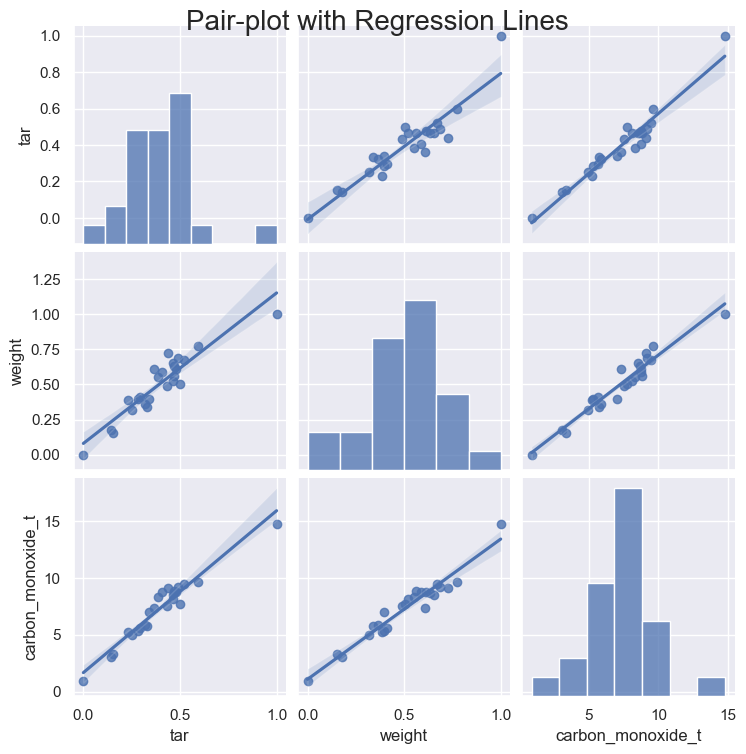

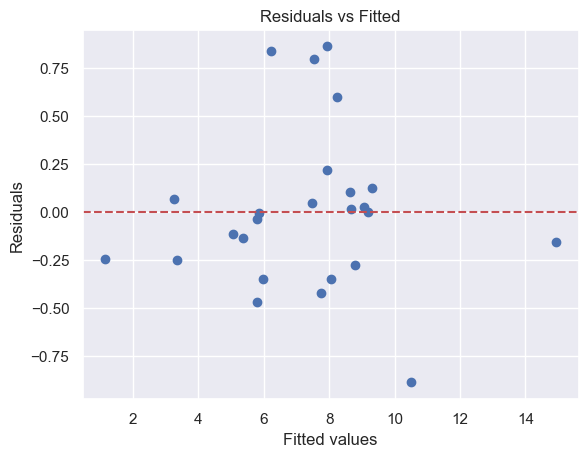

D:\PythonEnv\Matt\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


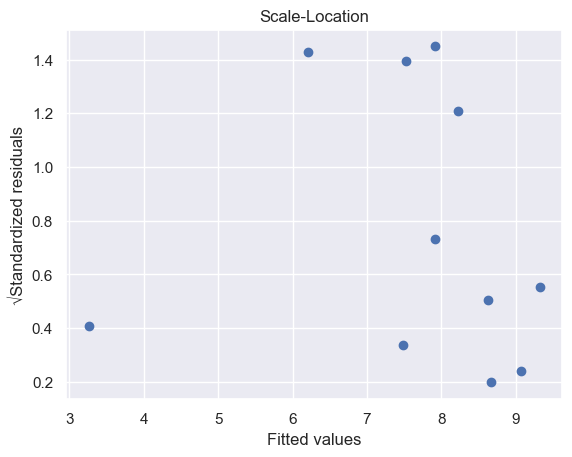

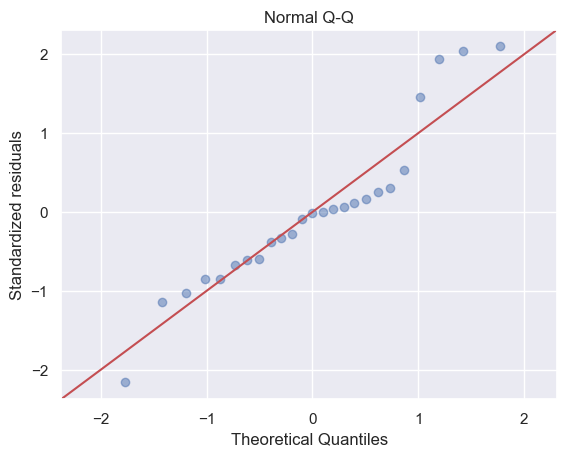

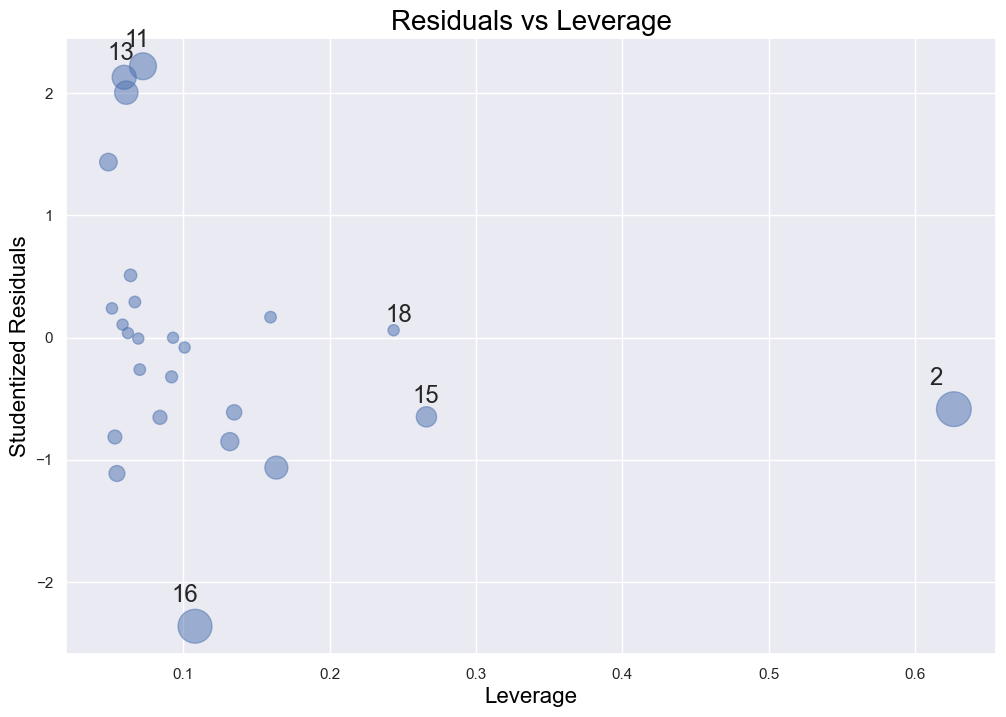

Breusch-Pagan test: 
LM statistic: 1.1644715084553503      LM-Test p-value: 0.5586479697361362 
F-statistic: 0.5373988916399635       F-Test p-value: 0.5917422076961143 

Durbin-Watson test:
statistic: 1.6933526521019022 

Jarque-Bera test:
statistic: 1.3120700058151644      p-value: 0.5189047166672134
Omni-normtest test:
statistic: 2.4282754787496463      p-value: 2.4282754787496463


,Variable,VIF,Tolerance
0,tar,39.377802,0.025395
1,weight,39.377802,0.025395


In [11]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1)  # + 1 чтобы не было 0-значений
new_explore_column = explore_column + '_t'
data[new_explore_column] = y_transformed

# Проводим анализ заново
enhanced_research = LinearRegressionResearch(data[selected_features + [new_explore_column]],
                                             column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()